# Наумов П. 3413

Тема 7. Исследование зависимости плотности от параметров НСВ в Python

Изучите материал из Notebook «Исследование зависимости плотности от параметров НСВ». Повторите примеры с исследованием поведения графика плотности от значений параметров НСВ для равномерного, экспоненциального, нормального законов распределения и проверку формул расчета математического ожидания и дисперсии для сгенерированных данных. Самостоятельно исследуйте поведение графика и расчет характеристик для другого вида непрерывного распределения (например, логнормальное, χ2-распределение, распределение Стьюдента, Фишера-Снедекора, см. Кремер §§ 4.8 – 4.9, https://docs.scipy.org/doc/scipy/reference/stats.html). Для рассматриваемого распределения оформите теоретическую часть (вставьте пояснения и расчетные формулы).

<b>Логнормальное распределение<b>

Логнормальное распределение — это распределение случайной величины, логарифм которой распределён нормально. Если случайная величина $Y$ имеет нормальное распределение $Y \sim \mathcal{N}(\mu, \sigma^2)$, то $X = e^Y$ будет иметь логнормальное распределение. Это распределение часто встречается для величин, которые всегда положительны и имеют асимметричное распределение с длинным правым хвостом, например: доходы, размеры частиц, время выполнения задачи, концентрации веществ.

**Формула плотности логнормального распределения:**

$$
f(x; s) = \frac{1}{s x \sqrt{2\pi}} \exp\left(-\frac{(\ln x)^2}{2s^2}\right), \quad x > 0, s > 0
$$
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm

Для сдвига и/или масштабирования распределения используются параметры loc и scale:

$$
f(x; s, \text{loc}, \text{scale}) = \frac{1}{s (x - \text{loc}) \sqrt{2\pi}} \exp\left(-\frac{\left[\ln\left(\frac{x - \text{loc}}{\text{scale}}\right)\right]^2}{2s^2}\right)
$$

**Параметры логнормального распределения scipy.stats.lognorm в scipy.stats:**

- s = $\sigma$ — параметр формы, стандартное отклонение логарифма случайной величины. Отвечает за форму распределения: при увеличении `s` распределение становится более широким и асимметричным (правый хвост удлиняется), пик плотности снижается и смещается влево. При $s \to 0$ распределение стремится к вырожденному.
- scale = $e^{\mu}$ — параметр масштаба, медиана распределения. Определяет сдвиг кривой вдоль оси $x$. Увеличение scale сдвигает распределение вправо, не меняя его форму.
- loc — параметр сдвига (по умолчанию loc=0). Если loc не равен нулю, то это соответствует сдвигу всей плотности на loc единиц вправо.

Свойства распределения:

математическое ожидание: $e^{\mu + \sigma^2/2}$

дисперсия: $(e^{\sigma^2} - 1) \cdot e^{2\mu + \sigma^2}$

<b>1. Исследование зависимости плотности от параметров<b>

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, fixed
plt.style.use('default')

def show_lognorm_pdf(s=1.0, scale=1.0, xmin=0.01, xmax=10, grid_size=1000):
    """
    Рисует график плотности логнормального распределения.
    s - параметр формы (разброс).
    scale - параметр масштаба (медиана).
    """
    X = np.linspace(xmin, xmax, grid_size)
    # Для логнормального распределения loc=0 (по умолчанию)
    Y = sts.lognorm.pdf(X, s=s, scale=scale)
    
    plt.figure(figsize=(8, 4))
    plt.plot(X, Y, 'b-', lw=3, alpha=0.8)
    plt.grid(ls=':', alpha=0.7)
    plt.xlabel('Значение (x)', fontsize=12)
    plt.ylabel('Плотность f(x)', fontsize=12)
    plt.title(f'Плотность логнормального распределения\n (s={s:.2f}, scale={scale:.2f})', fontsize=14)
    
    plt.xlim((xmin, xmax))
    plt.ylim((0, Y.max()*1.1))
    plt.tight_layout()
    plt.show()

# Создаем виджет
ip = widgets.interactive(
    show_lognorm_pdf,
    s=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=0.5, description='σ (s):', readout_format='.2f'),
    scale=widgets.FloatSlider(min=0.5, max=5.0, step=0.1, value=1.0, description='exp(μ):', readout_format='.2f'),
    xmin=widgets.FloatSlider(min=0.01, max=2.0, step=0.1, value=0.01, description='Xmin:', readout_format='.2f'),
    xmax=widgets.FloatSlider(min=5.0, max=20.0, step=0.5, value=10.0, description='Xmax:', readout_format='.2f'),
    grid_size=widgets.fixed(1000)
)
# Отображаем виджет
display(ip)

interactive(children=(FloatSlider(value=0.5, description='σ (s):', max=2.0, min=0.1), FloatSlider(value=1.0, d…

<b>2. Сравнение плотности и гистограммы<b>

Пример: mu=0, sigma=1


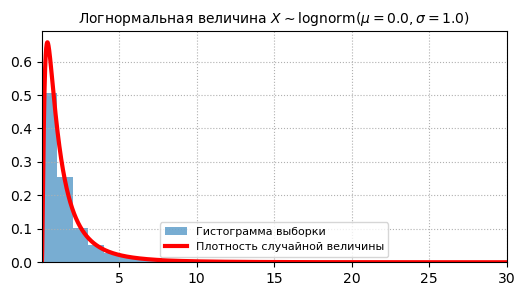

Математическое ожидание: 1.668, а по формуле: 1.649
Дисперсия: 4.905, а по формуле: 4.671


Пример: mu=1, sigma=0.5


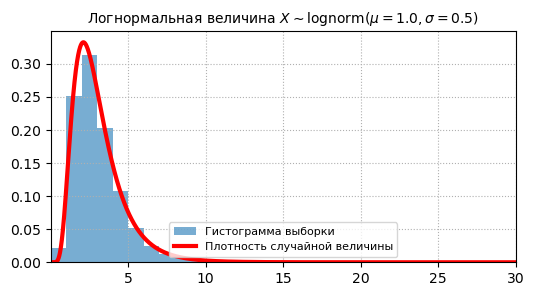

Математическое ожидание: 3.049, а по формуле: 3.08
Дисперсия: 2.5, а по формуле: 2.695


Пример: mu=2, sigma=0.8


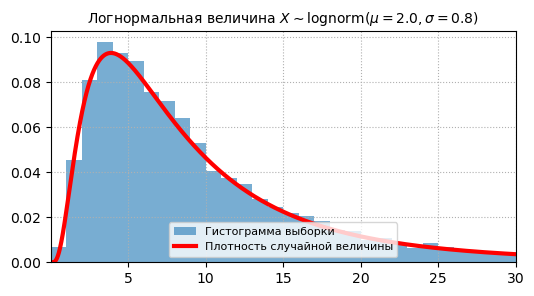

Математическое ожидание: 10.408, а по формуле: 10.176
Дисперсия: 100.816, а по формуле: 92.826


In [3]:
def plot_lognorm(mu=0.0, sigma=1.0, n_points=10000):
    """
    Отрисовывает распределение случайных точек по логнормальному закону
    mu - параметр, характеризующий среднее значение логарифма величины
    sigma - параметр, характеризующий разброс логарифма величины
    n_points - число наблюдений в выборке
    """
    # Преобразуем параметры для scipy.stats.lognorm
    s_param = sigma          # параметр формы s = σ
    scale_param = np.exp(mu) # параметр масштаба scale = exp(μ)
    
    # Генерация выборки
    sample = sts.lognorm.rvs(s=s_param, scale=scale_param, size=n_points)
    
    # Теоретические значения
    mean_theory = np.exp(mu + (sigma**2) / 2)
    var_theory = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
    
    # Строим от 0 до 30
    x_min = 0.01
    x_max = 30.0
    
    # Построение графика
    plt.figure(figsize=(6, 3))
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки', range=(x_min, x_max))
    grid = np.linspace(x_min, x_max, n_points)
    plt.plot(grid, sts.lognorm.pdf(grid, s=s_param, scale=scale_param), 
             color='red', lw=3, label='Плотность случайной величины')
    plt.title(r'Логнормальная величина $X \sim \mathrm{lognorm}(\mu=' + f'{mu}, \sigma={sigma})$', fontsize=10)
    plt.legend(fontsize=8, loc=8)
    plt.grid(ls=':')
    plt.xlim(x_min, x_max)
    plt.show()
    
    # Вывод результатов
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(mean_theory, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(var_theory, 3)}')


print("Пример: mu=0, sigma=1")
plot_lognorm(mu=0.0, sigma=1.0)

print("\n" + "="*60 + "\n")

print("Пример: mu=1, sigma=0.5")
plot_lognorm(mu=1.0, sigma=0.5)

print("\n" + "="*60 + "\n")

print("Пример: mu=2, sigma=0.8")
plot_lognorm(mu=2.0, sigma=0.8)